In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy

In [105]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [106]:
train = pd.read_csv("train.csv")

In [107]:
test = pd.read_csv("test.csv")

In [108]:
submission = pd.read_csv("SampleSubmission.csv")

In [109]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [110]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [111]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [112]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [113]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [114]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [116]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [117]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [118]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
#dayofweek는 요일을 가져오는 말
#월(0)~일(6)
train['dayofweek'] = train['datetime'].dt.dayofweek

In [119]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
#dayofweek는 요일을 가져오는 말
#월(0)~일(6)
test['dayofweek'] = test['datetime'].dt.dayofweek

<AxesSubplot:xlabel='year', ylabel='count'>

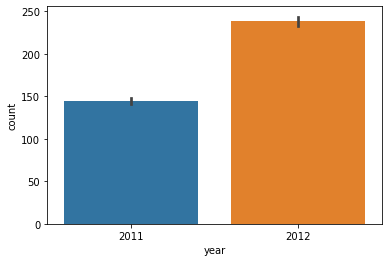

In [120]:
sns.barplot(data = train, x = 'year', y = 'count')

- 년도가 증가함에 따라 수요량이 증가했다. 하지만 2013년도에는 증가할지 감소할지 모름.
- 주어진 데이터 내에서는 년도별로 수요량 차이가 존재함을 알 수 있으므로 예측하는 데 year변수 사용가능


<AxesSubplot:xlabel='month', ylabel='count'>

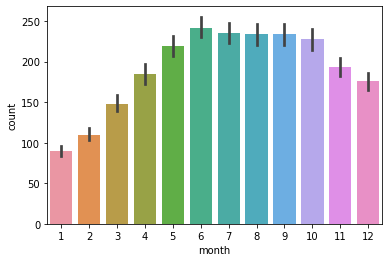

In [121]:
sns.barplot(data = train, x = 'month', y = 'count')

- 비교적 12,1,2월에 자전거 수요량이 적다.
- 6,7,8,9월 달에 자전거 수요량이 가장 많은 편이다. 
- month변수도 예측에 사용할 수 있다.

<AxesSubplot:xlabel='day', ylabel='count'>

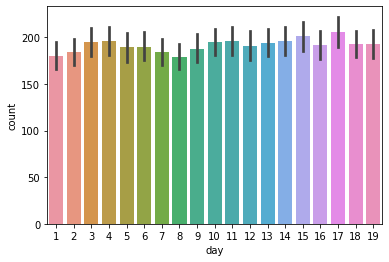

In [122]:
sns.barplot(data = train, x = 'day', y = 'count')

- 일별로는 수요량이 달라지긴하지만 극명한 변화는 보이지 않아서 변수 제거 유무는 추후 결정

<AxesSubplot:xlabel='season', ylabel='count'>

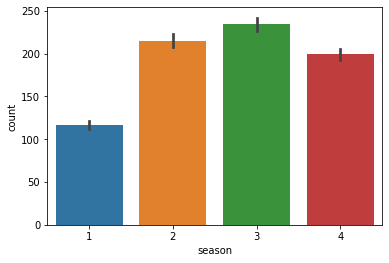

In [123]:
sns.barplot(data = train, x = 'season', y = 'count')

- 월별로 출력했을 때 12,1,2에 가장 수요량이 적었는데, 위 그래프는 다른 결과가 도출됨. 
- season을 나누는 경계가 다름을 알 수 있음

In [124]:
print(train[train['season']==1].month.unique())
print(train[train['season']==2].month.unique())
print(train[train['season']==3].month.unique())
print(train[train['season']==4].month.unique())

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


<ipython-input-125-84b112994aeb>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  train[['temp', 'atemp', 'humidity', 'windspeed']].hist(bins = 50, ax = ax)


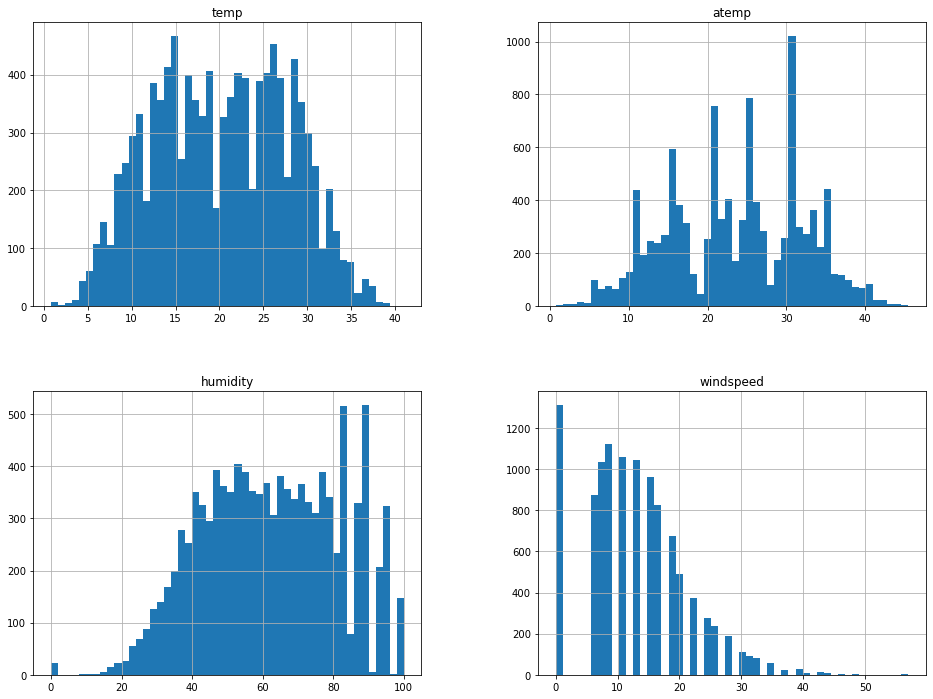

In [125]:
fig, ax = plt.subplots(figsize = (16, 12))

train[['temp', 'atemp', 'humidity', 'windspeed']].hist(bins = 50, ax = ax)
plt.show()

[Text(0.5, 1.0, 'windspeed')]

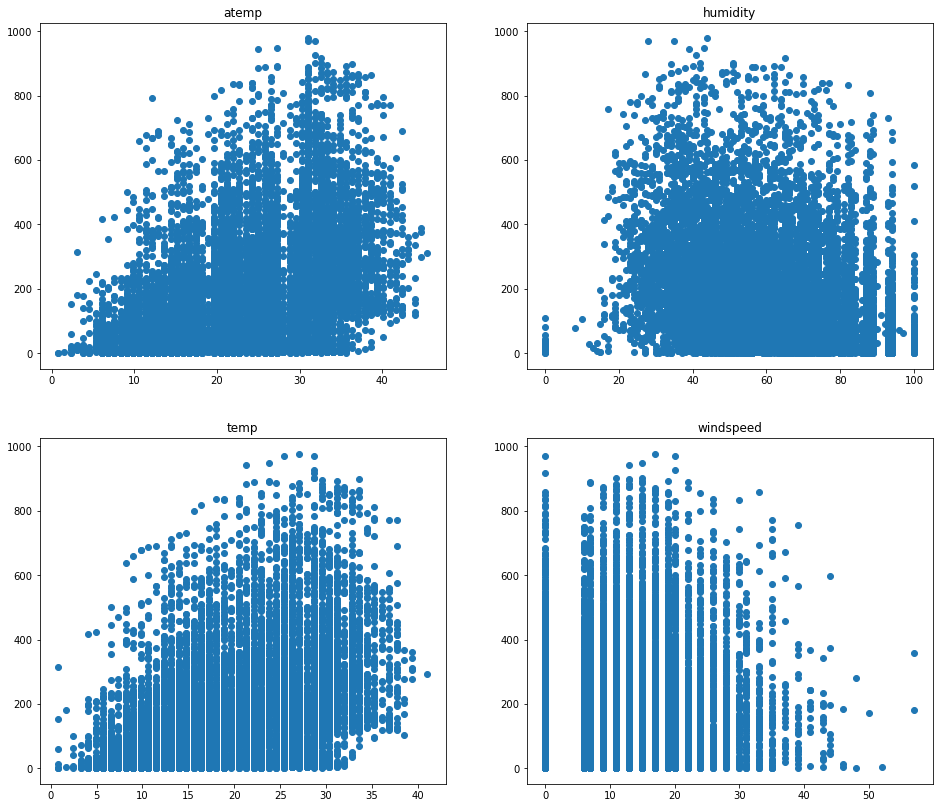

In [126]:
fig, ax = plt.subplots(2,2,figsize=(16,14))

ax[0][0].scatter(train['atemp'], train['count'])
ax[0][1].scatter(train['humidity'], train['count'])
ax[1][0].scatter(train['temp'], train['count'])
ax[1][1].scatter(train['windspeed'], train['count'])

ax[0][0].set(title='atemp')
ax[0][1].set(title='humidity')
ax[1][0].set(title='temp')
ax[1][1].set(title='windspeed')

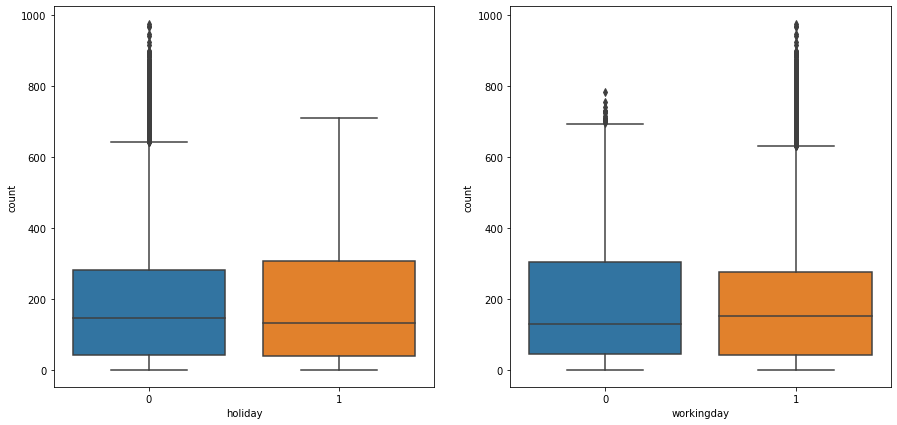

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
# holiday와 workingday의 boxplot
sns.boxplot(data = train, x = 'holiday', y = 'count', ax = ax[0])
sns.boxplot(data = train, x = 'workingday', y = 'count', ax = ax[1])

plt.show()
# 봤을 떄 휴일과 출근일의 자전거 대여량의 차이는 거의 없다. 

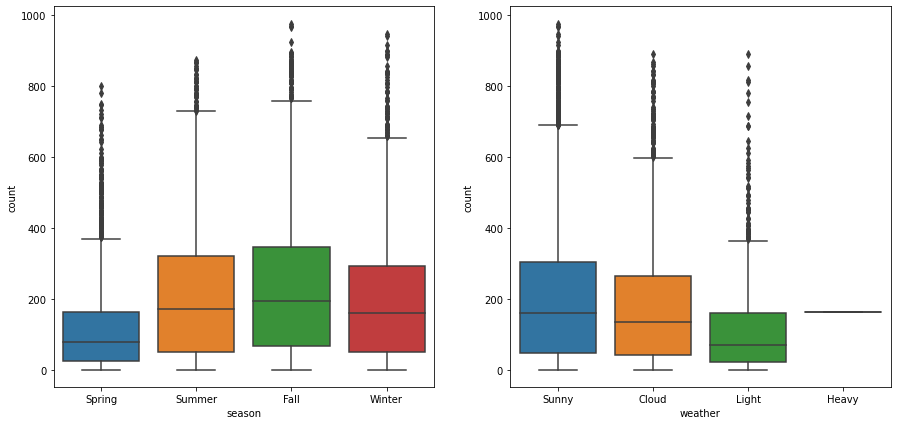

In [128]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))

sns.boxplot(data = train, x = 'season', y = 'count', ax = ax[0])
sns.boxplot(data = train, x = 'weather', y = 'count', ax = ax[1])

ax[0].set(xticklabels = ['Spring', 'Summer', 'Fall', 'Winter'])
ax[1].set(xticklabels = ['Sunny','Cloud','Light','Heavy'])

plt.show()

<AxesSubplot:xlabel='hour', ylabel='count'>

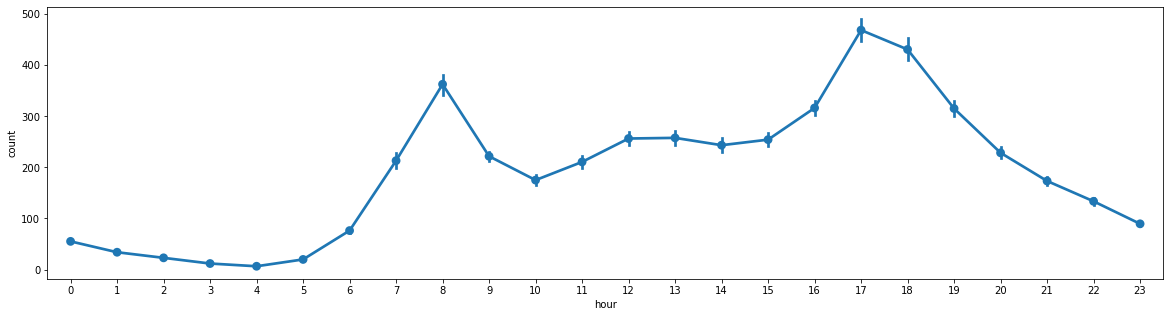

In [129]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(20, 5)

sns.pointplot(data = train, x = 'hour', y = 'count', ax = ax1)

 * 8, 17시경에 자전거 수요량이 많은 것을 확인할 수 있다. 

<AxesSubplot:xlabel='hour', ylabel='count'>

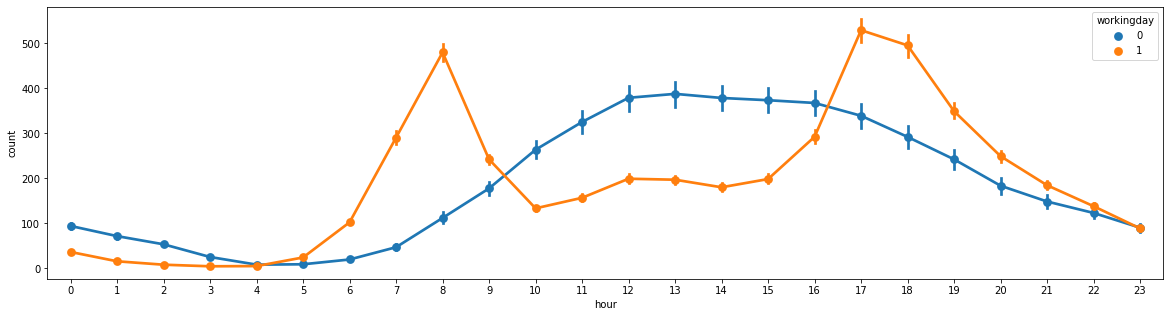

In [130]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(20, 5)

# seaborn에서 카테고리형 데이터를 고려한 그래프를 출력하고 싶으면, hue변수를 추가해준다.
# 따라서 시간대별로 workingday == 1일때, holiday == 0 일때 출력

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday', ax = ax1)

# 근무일일 때 출퇴근 시간에 자전거 수요량이 증가. -> 예측에 영향을 줄 수 있을 것

<AxesSubplot:xlabel='hour', ylabel='count'>

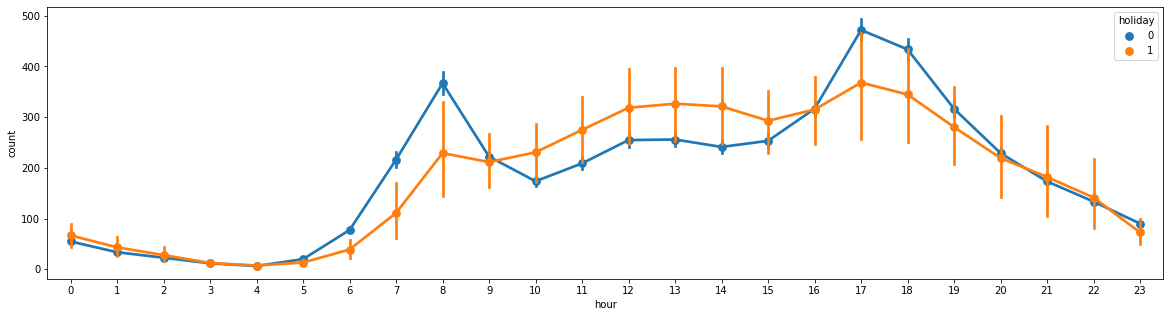

In [131]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(20,5)

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'holiday', ax = ax1)

<AxesSubplot:xlabel='hour', ylabel='count'>

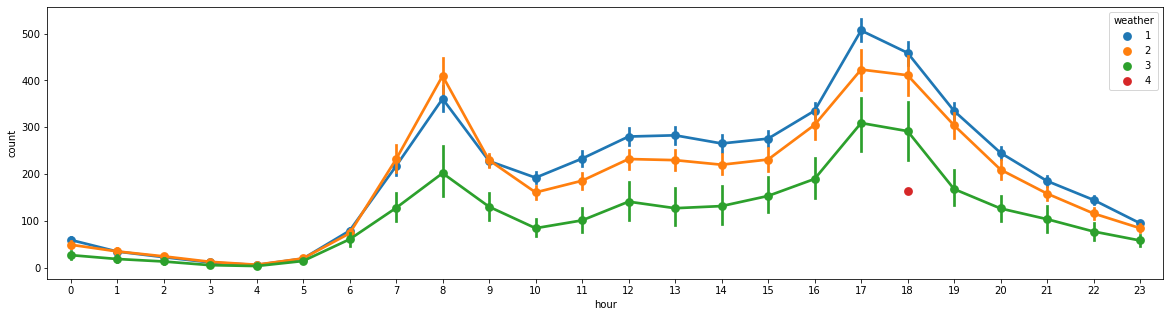

In [132]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(20,5)

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather', ax = ax1)
# 1 : sunny 2 : Cloud 3 : Light 4 : Heavy

<AxesSubplot:xlabel='hour', ylabel='count'>

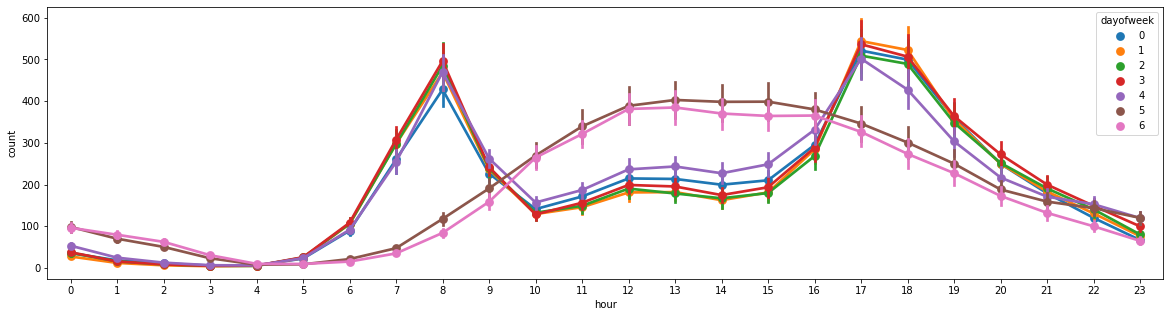

In [133]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(20, 5)

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek', ax = ax1)

<AxesSubplot:title={'center':'Correlation of Numeric Features with Rental Count'}>

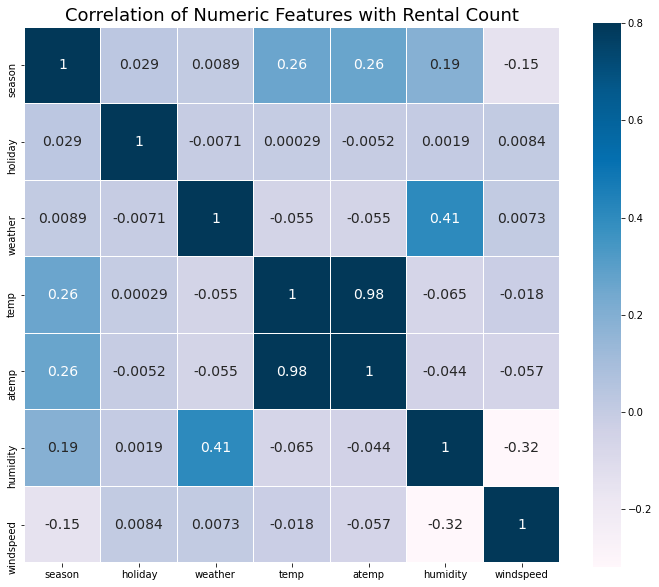

In [134]:
corr_data = train[['datetime', 'season', 'holiday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
colormap = plt.cm.PuBu
f, ax = plt.subplots(figsize = (12, 10))
plt.title('Correlation of Numeric Features with Rental Count', y = 1, size = 18)
sns.heatmap(corr_data.corr(), vmax = .8, linewidths = 0.1, square = True, annot = True, cmap = colormap, linecolor = 'white', annot_kws = {'size':14})

<AxesSubplot:title={'center':'test windspeed'}, xlabel='windspeed', ylabel='count'>

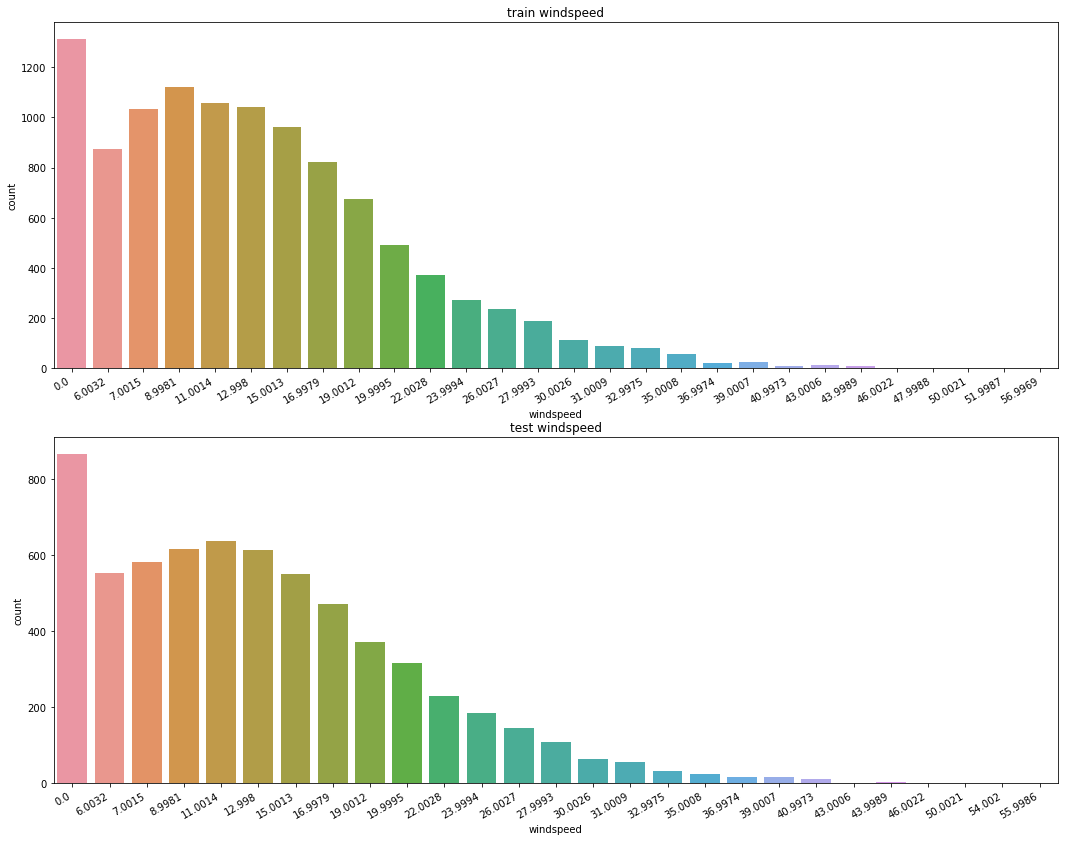

In [135]:
fig, axes = plt.subplots(nrows = 2, figsize = (18, 14))

plt.sca(axes[0])
plt.xticks(rotation = 30, ha = 'right')
axes[0].set(ylabel = 'count', title = 'train windspeed')
sns.countplot(data = train, x = 'windspeed', ax = axes[0])

plt.sca(axes[1])
plt.xticks(rotation = 30, ha = 'right')
axes[1].set(ylabel = 'count', title = 'test windspeed')
sns.countplot(data = test, x = 'windspeed', ax = axes[1])

In [136]:
def concatenate_year_month(datetime):
    return '{0}-{1}'.format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)
test['year_month'] = test['datetime'].apply(concatenate_year_month)

print(train.shape)
train[['datetime', 'year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<AxesSubplot:xlabel='year_month', ylabel='count'>

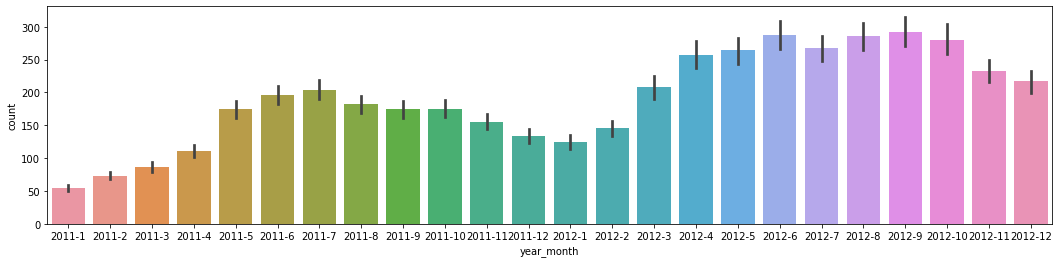

In [137]:
fig, ax = plt.subplots(figsize = (18, 4))
sns.barplot(data = train, y = 'count', x = 'year_month')

 * 2011년보다 2012년 수요량이 더 늘었고 따뜻한 계절일 때 수요량이 더 큰 것을 확인할 수 있음. 

In [138]:
from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    return multiple_outliers
    
Outliers_to_drop = detect_outliers(train, 2, ['temp','atemp','casual','registered','humidity', 'windspeed','count'])

In [139]:
train.loc[Outliers_to_drop]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012,3,14,17,0,0,2,2012-3
6779,2012-03-19 18:00:00,1,0,1,1,26.24,31.060,57,16.9979,120,681,801,2012,3,19,18,0,0,0,2012-3
6825,2012-04-02 17:00:00,2,0,1,1,20.50,24.240,29,19.0012,128,601,729,2012,4,2,17,0,0,0,2012-4
6849,2012-04-03 17:00:00,2,0,1,1,25.42,30.305,17,12.9980,123,634,757,2012,4,3,17,0,0,1,2012-4
6850,2012-04-03 18:00:00,2,0,1,1,24.60,30.305,26,11.0014,139,661,800,2012,4,3,18,0,0,1,2012-4
6897,2012-04-05 17:00:00,2,0,1,1,20.50,24.240,31,11.0014,145,677,822,2012,4,5,17,0,0,3,2012-4
7088,2012-04-13 17:00:00,2,0,1,1,22.96,26.515,24,11.0014,117,621,738,2012,4,13,17,0,0,4,2012-4
7640,2012-05-17 17:00:00,2,0,1,1,27.06,31.060,31,8.9981,133,719,852,2012,5,17,17,0,0,3,2012-5
7641,2012-05-17 18:00:00,2,0,1,1,27.06,31.060,27,11.0014,134,734,868,2012,5,17,18,0,0,3,2012-5
7664,2012-05-18 17:00:00,2,0,1,1,27.06,31.060,34,8.9981,124,688,812,2012,5,18,17,0,0,4,2012-5


In [140]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop = True)
train.shape

(10846, 20)

In [141]:
df_train_num = train[['count','temp','atemp','casual','registered','humidity','windspeed']]

for col in df_train_num:
    print('{:15}'.format(col),
         'Skewness: {:05.2f}'.format(train[col].skew()),' ','Kurtosis: {:06.2f}'.format(train[col].kurt()))

count           Skewness: 01.21   Kurtosis: 001.20
temp            Skewness: 00.01   Kurtosis: -00.91
atemp           Skewness: -0.10   Kurtosis: -00.85
casual          Skewness: 02.52   Kurtosis: 007.74
registered      Skewness: 01.51   Kurtosis: 002.61
humidity        Skewness: -0.09   Kurtosis: -00.76
windspeed       Skewness: 00.58   Kurtosis: 000.63


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental count by minute')]

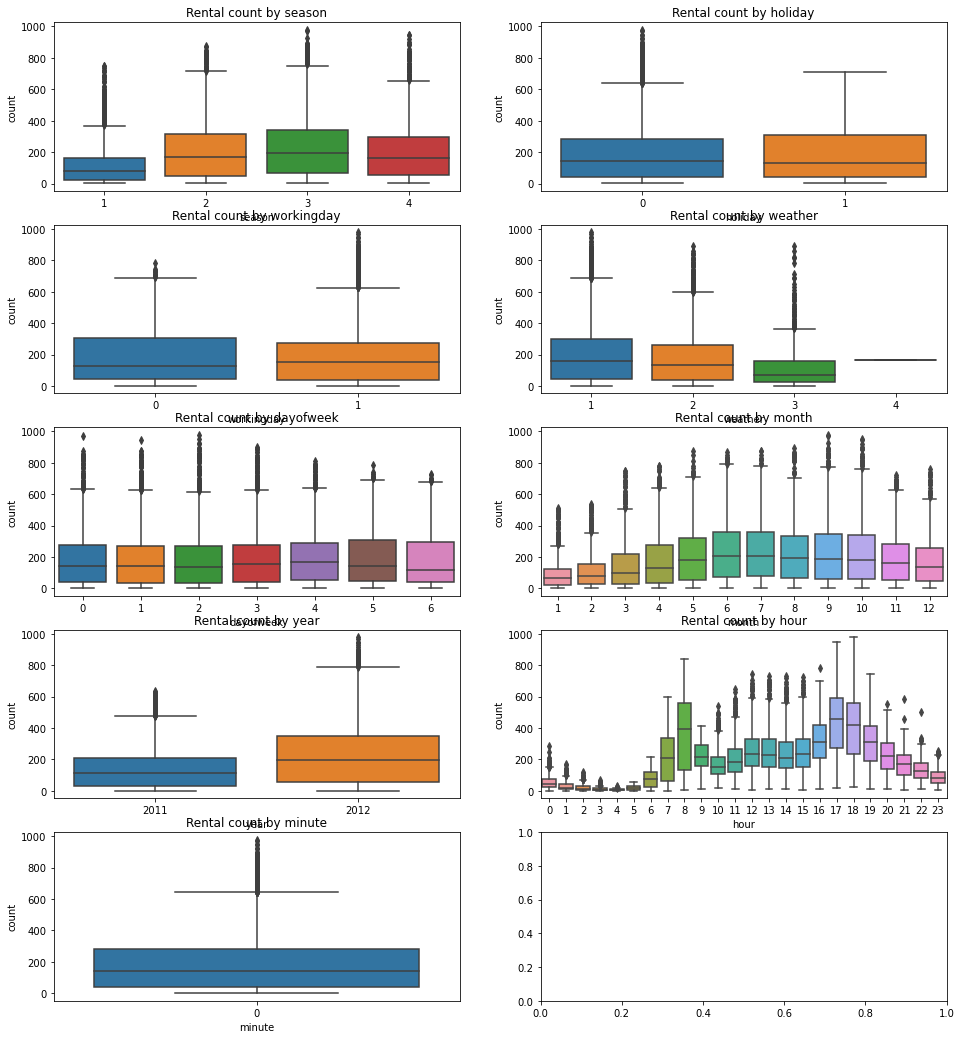

In [142]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (16, 18))
sns.boxplot(data = train, y = 'count', x = 'season', orient = 'v', ax = axes[0][0])
sns.boxplot(data = train, y = 'count', x = 'holiday', orient = 'v', ax = axes[0][1])
sns.boxplot(data = train, y = 'count', x = 'workingday', orient = 'v', ax = axes[1][0])
sns.boxplot(data = train, y = 'count', x = 'weather', orient = 'v', ax = axes[1][1])
sns.boxplot(data = train, y = 'count', x = 'dayofweek', orient = 'v', ax = axes[2][0])
sns.boxplot(data = train, y = 'count', x = 'month', orient = 'v', ax = axes[2][1])
sns.boxplot(data = train, y = 'count', x = 'year', orient = 'v', ax = axes[3][0])
sns.boxplot(data = train, y = 'count', x = 'hour', orient = 'v', ax = axes[3][1])
sns.boxplot(data = train, y = 'count', x = 'minute', orient = 'v', ax = axes[4][0])

axes[0][0].set(ylabel = 'count', title = 'Rental count by season')
axes[0][1].set(ylabel = 'count', title = 'Rental count by holiday')
axes[1][0].set(ylabel = 'count', title = 'Rental count by workingday')
axes[1][1].set(ylabel = 'count', title = 'Rental count by weather')
axes[2][0].set(ylabel = 'count', title = 'Rental count by dayofweek')
axes[2][1].set(ylabel = 'count', title = 'Rental count by month')
axes[3][0].set(ylabel = 'count', title = 'Rental count by year')
axes[3][1].set(ylabel = 'count', title = 'Rental count by hour')
axes[4][0].set(ylabel = 'count', title = 'Rental count by minute')


Skewness: 1.210923
Kurtosis: 1.200871


/Users/sojung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


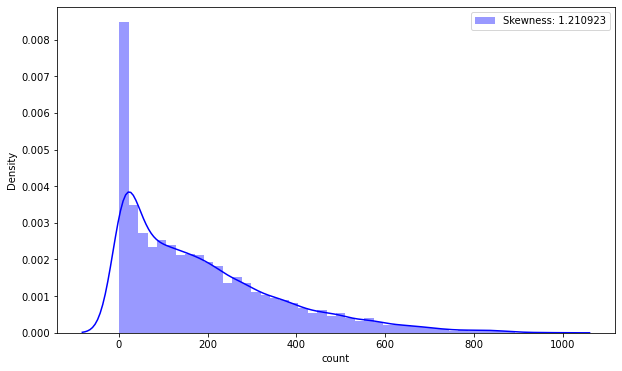

In [143]:
f, ax = plt.subplots(1, 1, figsize =(10, 6))
g = sns.distplot(train['count'], color = 'b', label = 'Skewness: {:2f}'.format(train['count'].skew()), ax = ax)
g = g.legend(loc = 'best')

print('Skewness: %f' % train['count'].skew())
print('Kurtosis: %f' % train['count'].kurt())

* feature를 만져주기에 앞서 타겟 변수의 첨도와 왜도부터 살펴보도록 하겠습니다.
* 일반적으로 왜도는 0을 기준으로 판단하고, 첨도는 3을 기준으로 판단한다고 합니다.
* 수치적으로는 그렇게 큰 차이는 없지만 displot으로 확인해보니 0에 많이 치우친 것을 확인할 수 있다.
* Log scaling을 이용하여 정규화 시켜주도록 한다.

/Users/sojung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.975198
Kurtosis: 0.247435


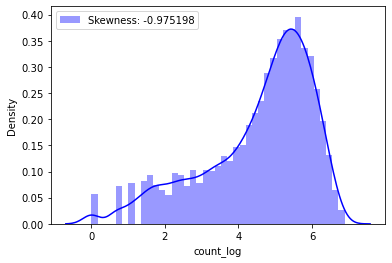

In [144]:
train['count_log'] = train['count'].map(lambda i:np.log(i) if i>0 else 0)
f, ax = plt.subplots()
g = sns.distplot(train['count_log'], color = 'b', label = 'Skewness: {:2f}'.format(train['count_log'].skew()), ax = ax)
g = g.legend(loc = 'best')

print('Skewness: %f' % train['count_log'].skew())
print('Kurtosis: %f' % train['count_log'].kurt())

train.drop('count', axis = 1, inplace = True)

* 타겟변수인 count에 log를 취해준 모습.
* 모델에 사용되는 모든 변수들은 첨도와 왜도를 확인해주는 것이 좋다.
* 또한 변수들의 크기 차이에 민감한 모델을 사용한다면 더욱 Scaling은 필수

* 타겟변수에 log

In [145]:
trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]

In [156]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    wind0 = data.loc[data['windspeed'] == 0]
    windnot0 = data.loc[data['windspeed'] != 0]
    
    col = ['season', 'weather', 'temp', 'humidity', 'atemp', 'day']
    windnot0['windspeed'] = windnot0['windspeed'].astype('str')
    
    rf = RandomForestClassifier()
    
    rf.fit(windnot0[col], windnot0['windspeed'])
    
    pred_wind0 = rf.predict(X = wind0[col])
    
    wind0['windspeed'] = pred_wind0
    
    data = windnot0.append(wind0)
    data['windspeed'] = data['windspeed'].astype('float')
    
    data.reset_index(inplace = True)
    data.drop('index', inplace = True, axis = 1)
    
    return data

In [157]:
train = predict_windspeed(train)
test = predict_windspeed(test)

ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required.

In [2]:
import tensorflow as tf


OSError: dlopen(/Users/sojung/miniforge3/envs/tf/lib/python3.9/site-packages/tensorflow/python/platform/../../core/platform/_cpu_feature_guard.so, 6): Symbol not found: __ZNKSt3__115basic_stringbufIcNS_11char_traitsIcEENS_9allocatorIcEEE3strEv
  Referenced from: /Users/sojung/miniforge3/envs/tf/lib/python3.9/site-packages/tensorflow/python/platform/../../core/platform/_cpu_feature_guard.so (which was built for Mac OS X 12.3)
  Expected in: /usr/lib/libc++.1.dylib
